<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/Ordenacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [14]:
def bubble_sort(A):
    for i in range(len(A)-1, 0, -1):
        for j in range(0, i):
            if (A[j+1] < A[j]):
                A[j], A[j+1] = A[j+1], A[j]
    return A


def tim_sort(A): #l,r,k foram introduzidos para faciltiar a chamada de funções
    return  sorted(A)


def merge_sort(vetor, aux, esquerda, direita):
    if direita <= esquerda:
        return
    centro = (esquerda + direita) // 2
    merge_sort(vetor, aux, esquerda, centro)
    merge_sort(vetor, aux, centro + 1, direita)
    merge(vetor, aux, esquerda, centro, direita)

def merge(vetor, aux, esquerda, centro, direita):
    i = esquerda
    j = centro + 1
    for index in range(esquerda, direita + 1):
        aux[index] = vetor[index]
    for index in range(esquerda, direita + 1):
        if i > centro:
            vetor[index] = aux[j]
            j += 1
        elif j > direita:
            vetor[index] = aux[i]
            i += 1
        elif aux[j] < aux[i]:
            vetor[index] = aux[j]
            j += 1
        else:
            vetor[index] = aux[i]
            i += 1


  

Coleta de dados dos experimentos

In [17]:
import time
from numpy import random
DOMAIN = 1000 ##Você deve escolher um valor mais adequado
def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain, size=tam))
    start = time.time()    
    aux = [0] * len(L)
    try:
      func(L, aux, 0, len(L) - 1) 
    except:
      func(L) 
    end = time.time()
    sum += end-start
  return sum/rounds

#defines the algorithms to be processed
algorithms = [bubble_sort, tim_sort, merge_sort]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 10

sizes = [500,1000,1500,2000,2500] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting experiments for datasets with size={sizes[i]}, each experiment has {num_rounds} rounds.")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting experiments for datasets with size=500, each experiment has 10 rounds.
Starting experiments for datasets with size=1000, each experiment has 10 rounds.
Starting experiments for datasets with size=1500, each experiment has 10 rounds.
Starting experiments for datasets with size=2000, each experiment has 10 rounds.
Starting experiments for datasets with size=2500, each experiment has 10 rounds.
Finish data collection


Formata os dados do experimento para serem exibidos

In [18]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
bubble_sort##500,0.024978,bubble_sort,500
tim_sort##500,0.000110,tim_sort,500
merge_sort##500,0.002052,merge_sort,500
bubble_sort##1000,0.108748,bubble_sort,1000
tim_sort##1000,0.000237,tim_sort,1000
merge_sort##1000,0.005009,merge_sort,1000
bubble_sort##1500,0.244638,bubble_sort,1500
tim_sort##1500,0.000375,tim_sort,1500
merge_sort##1500,0.007717,merge_sort,1500
bubble_sort##2000,0.443355,bubble_sort,2000


Resultado do experimento (gráfico)

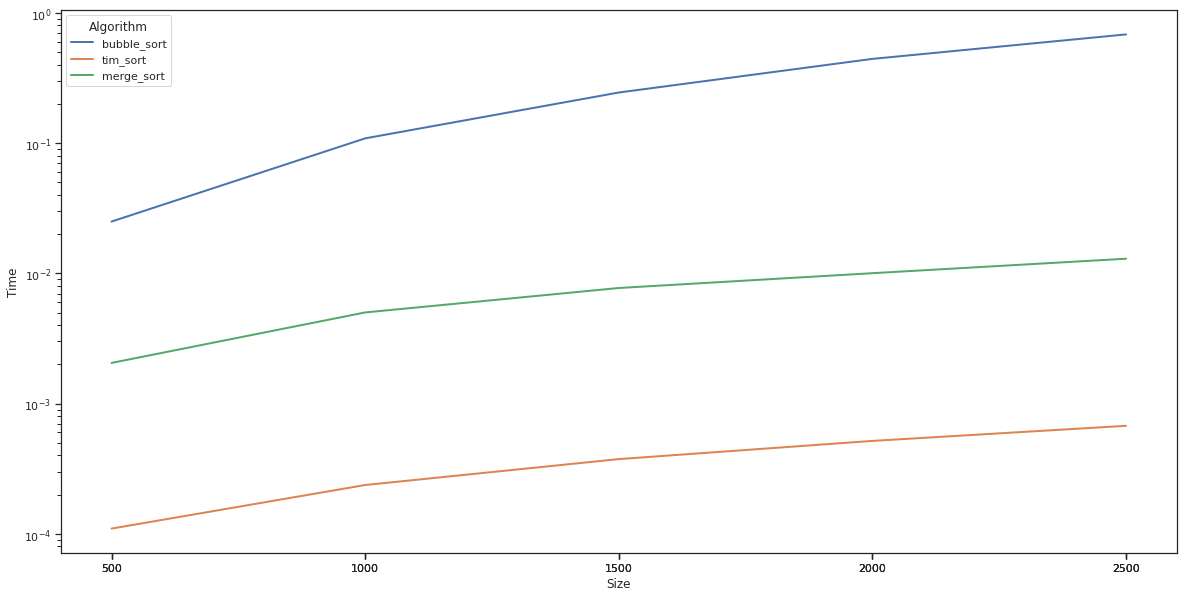

In [19]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()